# lin.Regression with only 3 or 6 variables #


### Importing the dataset and libraries


we have the data from: https://www.kaggle.com/datasets/dumanmesut/individual-carbon-footprint-calculation/data

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv('Carbon_Emission.csv',sep=";")
df.head(3)

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595


### sorting the variable into groups 

In [68]:
variables_quantitative =["Vehicle Monthly Distance Km", "How Many New Clothes Monthly","Waste Bag Weekly Count"]
#variables_quantitative = ["Monthly Grocery Bill", "Vehicle Monthly Distance Km", "Waste Bag Weekly Count", "How Long TV PC Daily Hour","How Many New Clothes Monthly", "How Long Internet Daily Hour"]             

variables_mit_mehreren_antwortmoeglichkeiten=[]
#variables_mit_mehreren_antwortmoeglichkeiten=["Recycling" ,"Cooking_With"]       

variables_for_one_hot_encoded=['Frequency of Traveling by Air','Body Type']
#variables_for_one_hot_encoded=['Body Type','Sex','Diet','How Often Shower','Heating Energy Source','Social Activity','Frequency of Traveling by Air','Waste Bag Size','Energy efficiency']

variables_transport_vehicle_type=["Transport","Vehicle Type"]                    


### variables "Transport" and "Vehicle Type" (they have combined information)


In [69]:

##create new column: 
df["Transport Vehicle Type"]=df["Vehicle Type"] #definiere neue Spalte
df.loc[df["Transport Vehicle Type"].isna(), "Transport Vehicle Type"] = df["Transport"] # Werte aus 'Transport' übernehmen, wenn 'Vehicle Type' NaN ist
#df[["Transport","Vehicle Type","Transport Vehicle Type"]]



##add variable to one-hot-encoding
if "Transport Vehicle Type" not in variables_for_one_hot_encoded: ##wenn es noch nicht hinzugefügt wurde bzw is one element in the list already?
    variables_for_one_hot_encoded.append("Transport Vehicle Type") 

##veranschaulichen der neuen Spalten und ihrer Werte
df[["Transport","Vehicle Type","Transport Vehicle Type"]]


,Transport,Vehicle Type,Transport Vehicle Type
0,public,NaN,public
1,walk/bicycle,NaN,walk/bicycle
2,private,petrol,petrol
3,walk/bicycle,NaN,walk/bicycle
4,private,diesel,diesel
...,...,...,...
9995,private,hybrid,hybrid
9996,private,lpg,lpg
9997,walk/bicycle,NaN,walk/bicycle
9998,private,petrol,petrol


### different models:

quelle: https://www.kaggle.com/code/mikemoney/carbon-footprint-regression-data-eda-ml-ann

I changed:
* did not drop first column for one-hot-encoding
* specify random forrest- does not work: RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

##### ❌ Ella wants to use XGBoost, LightGBM (for learning) ❌

In [70]:
#!!! one-hot-encoding without dropping the first column

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df[variables_quantitative + variables_for_one_hot_encoded]   #Ziel: every column except "CarbonEmission"

# One-Hot-Encoding for categorical variables using the list "variables_for_one_hot_encoded"
cf = ColumnTransformer(
    [(col, OneHotEncoder(), [col]) for col in variables_for_one_hot_encoded],  
    remainder="passthrough")   

cf.fit(X)
X_transformed = cf.transform(X)

y = df["CarbonEmission"]
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y, train_size = 0.75)

#X

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

linearregression = LinearRegression()
decisiontreeregression = DecisionTreeRegressor()
decisiontreeregression2 = DecisionTreeRegressor(max_depth=3)
supportvectorregression = SVR(kernel='rbf')
randomforestregression = RandomForestRegressor()
randomforestregression2 = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
xgbregression = XGBRegressor()
lgbm = LGBMRegressor()   # Ella made this example:
hist_gb = HistGradientBoostingRegressor() # Ella made this example:


linearregression.fit(X_train, y_train)
decisiontreeregression.fit(X_train, y_train)
decisiontreeregression2.fit(X_train, y_train)
supportvectorregression.fit(X_train, y_train)
randomforestregression.fit(X_train, y_train)
randomforestregression2.fit(X_train, y_train)
xgbregression.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
hist_gb.fit(X_train, y_train)


y_lin = linearregression.predict(X_test)
y_dectree = decisiontreeregression.predict(X_test)
y_supvec = supportvectorregression.predict(X_test)
y_randfor = randomforestregression.predict(X_test)
y_randfor2 = randomforestregression2.predict(X_test)
y_xgb = xgbregression.predict(X_test)
y_lgbm = lgbm.predict(X_test)
y_hist_gb = hist_gb.predict(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/elisabeth_python-umgebung_nr1/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 18
[LightGBM] [Info] Start training from score 2269.487867


In [72]:
data0 = {"Regression Algorithms": ["Linear Regression", "Decision Tree Regression","Decision Tree Regression2",
                                   "Support Vector Regression", "Random Forest Regression",
                                   "Random Forest Regression2","XGB Regression",
                                   "Ellas: LGBMRegressor", "Ellas: HistGradientBoostingRegressor"],
      "score (for test-data)" :[linearregression.score(X_test,y_test), 
               decisiontreeregression.score(X_test,y_test), 
               decisiontreeregression2.score(X_test,y_test), 
               supportvectorregression.score(X_test,y_test), 
               randomforestregression.score(X_test,y_test), 
               randomforestregression2.score(X_test,y_test), 
               xgbregression.score(X_test,y_test),
               lgbm.score(X_test,y_test),
               hist_gb.score(X_test,y_test)],
"score (for train-data)":[linearregression.score(X_train,y_train), 
               decisiontreeregression.score(X_train,y_train), 
               decisiontreeregression2.score(X_train,y_train), 
               supportvectorregression.score(X_train,y_train), 
               randomforestregression.score(X_train,y_train), 
               randomforestregression2.score(X_train,y_train), 
               xgbregression.score(X_train,y_train),
               lgbm.score(X_train,y_train),
               hist_gb.score(X_train,y_train)]}

pd.DataFrame(data0).sort_values(by='score (for test-data)', ascending=False) #we see that Decisision Tree Regression is overfitting

,Regression Algorithms,score (for test-data),score (for train-data)
7,Ellas: LGBMRegressor,0.882635,0.907343
8,Ellas: HistGradientBoostingRegressor,0.881703,0.907486
6,XGB Regression,0.868408,0.947714
4,Random Forest Regression,0.855571,0.979273
5,Random Forest Regression2,0.839144,0.971164
0,Linear Regression,0.838674,0.832003
1,Decision Tree Regression,0.728392,0.999984
2,Decision Tree Regression2,0.643788,0.657391
3,Support Vector Regression,0.263240,0.268849


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNetCV, LassoCV, LassoLarsIC, LassoLarsCV, Lars, LarsCV, RidgeCV, BayesianRidge, Ridge, SGDRegressor, HuberRegressor, TweedieRegressor, ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import PoissonRegressor, GammaRegressor, RANSACRegressor, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
#from sklearn.linear_model import LinearSVR
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import TweedieRegressor
#from sklearn.linear_model import GeneralizedLinearRegressor 
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import OrthogonalMatchingPursuitCV, PassiveAggressiveRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge

# Initialize all the regressors
models = {
    "Linear Regression": LinearRegression(),
    "ElasticNetCV": ElasticNetCV(),
    "LassoCV": LassoCV(),
    "LassoLarsIC": LassoLarsIC(),
    "LassoLarsCV": LassoLarsCV(),
    "Lars": Lars(),
    "LarsCV": LarsCV(),
    "RidgeCV": RidgeCV(),
    "BayesianRidge": BayesianRidge(),
    "Ridge": Ridge(),
    "SGDRegressor": SGDRegressor(),
    "HuberRegressor": HuberRegressor(),
    "TweedieRegressor": TweedieRegressor(),
    "ElasticNet": ElasticNet(),
    "Lasso": Lasso(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "ExtraTreeRegressor": ExtraTreeRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    #"LinearSVR": LinearSVR(),
    "RandomForestRegressor": RandomForestRegressor(),
    "BaggingRegressor": BaggingRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "HistGradientBoostingRegressor": HistGradientBoostingRegressor(),
    "PoissonRegressor": PoissonRegressor(),
    "LGBMRegressor": LGBMRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "MLPRegressor": MLPRegressor(),
    "GammaRegressor": GammaRegressor(),
    "RANSACRegressor": RANSACRegressor(),
    "OrthogonalMatchingPursuitCV": OrthogonalMatchingPursuitCV(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    #"OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
    "ExtraTreeRegressor": ExtraTreeRegressor(),
    "DummyRegressor": DummyRegressor(),
    #"LassoLars": LassoLars(),
    "KernelRidge": KernelRidge()
}

# Fit all the models and evaluate
results = []
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)  #r2 = round(r2_score(y_test, y_pred),5)
        mae = mean_absolute_error(y_test, y_pred)
        train_score = model.score(X_train, y_train)
        results.append((name, r2, mae, train_score))
    except Exception as e:
        results.append((name, "Error", str(e), "Error"))

# Create a dataframe to display results
results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'mean absolute error', 'Train Score'])
results_df.sort_values(by='R2 Score', ascending=False, inplace=True) #sort by R2-Score
results_df

/opt/homebrew/Caskroom/miniforge/base/envs/elisabeth_python-umgebung_nr1/lib/python3.11/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/Caskroom/miniforge/base/envs/elisabeth_python-umgebung_nr1/lib/python3.11/site-packages/sklearn/linear_model/_glm/glm.py:283: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/opt/homebrew/Caskroom/miniforge/base/envs/elisabeth_python-umgebung_nr1/lib/python3.11/site-packages/sklea

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 18
[LightGBM] [Info] Start training from score 2269.487867


/opt/homebrew/Caskroom/miniforge/base/envs/elisabeth_python-umgebung_nr1/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/elisabeth_python-umgebung_nr1/lib/python3.11/site-packages/sklearn/linear_model/_glm/glm.py:283: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


,Model,R2 Score,mean absolute error,Train Score
26,LGBMRegressor,8.826355e-01,2.792936e+02,9.073434e-01
24,HistGradientBoostingRegressor,8.817025e-01,2.802005e+02,9.074860e-01
21,GradientBoostingRegressor,8.793207e-01,2.829598e+02,8.851465e-01
19,RandomForestRegressor,8.556072e-01,3.070304e+02,9.793967e-01
20,BaggingRegressor,8.435467e-01,3.197549e+02,9.712656e-01
22,ExtraTreesRegressor,8.433341e-01,3.190126e+02,9.999844e-01
0,Linear Regression,8.386740e-01,3.178543e+02,8.320030e-01
3,LassoLarsIC,8.386740e-01,3.178543e+02,8.320030e-01
4,LassoLarsCV,8.386740e-01,3.178543e+02,8.320030e-01
5,Lars,8.386740e-01,3.178543e+02,8.320030e-01


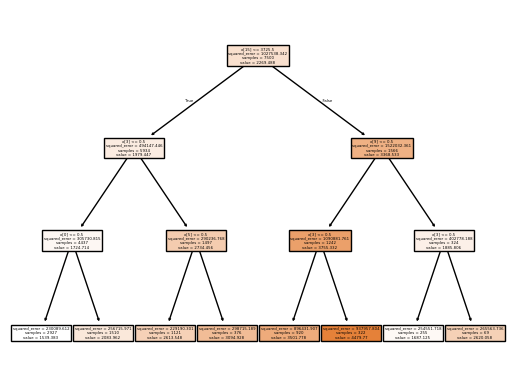

In [76]:
#plotte dicision-tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(decisiontreeregression2, filled=True)
plt.show()

In [77]:
#code for creating subsets:

import itertools

#name_columns=df.columns.tolist()
#name_columns.remove('CarbonEmission')
#name_columns=['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill', 'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km', 'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour', 'Energy efficiency', 'Recycling', 'Cooking_With']
name_columns=range(6)

# Print the length of name_columns
print("Number of columns:", len(name_columns))

#list of all possible subsets with 3,4,5 or 6 elements
subsets3 = list(itertools.combinations(name_columns, 3))
subsets4 = list(itertools.combinations(name_columns, 4))
subsets5 = list(itertools.combinations(name_columns, 5))
subsets6 = list(itertools.combinations(name_columns, 6))
liste_subsets=subsets3 + subsets4 + subsets5 + subsets6




# Print the lengths of the subsets
print("Number of 3-element subsets:", len(subsets3))
print("Number of 4-element subsets:", len(subsets4))
print("Number of 5-element subsets:", len(subsets5))
print("Number of 6-element subsets:", len(subsets6))

# Print a sample of subsets6
print("Sample of 3-element subsets:", subsets3[:28])

Number of columns: 6
Number of 3-element subsets: 20
Number of 4-element subsets: 15
Number of 5-element subsets: 6
Number of 6-element subsets: 1
Sample of 3-element subsets: [(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 3, 4), (0, 3, 5), (0, 4, 5), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 4), (1, 3, 5), (1, 4, 5), (2, 3, 4), (2, 3, 5), (2, 4, 5), (3, 4, 5)]


In [78]:

name_columns=range(6)
name_columns= ["Monthly Grocery Bill", "Vehicle Monthly Distance Km", "Waste Bag Weekly Count", 
               "How Long TV PC Daily Hour","How Many New Clothes Monthly", "How Long Internet Daily Hour"]             


#list of all possible subsets with 4 or 5  elements
subsets4 = list(itertools.combinations(name_columns, 4))
subsets5 = list(itertools.combinations(name_columns, 5))

liste_subsets= subsets4 + subsets5 

results=[]
for columns_combination in liste_subsets:
    X = df[list(columns_combination)]
    y=df['CarbonEmission']
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

    ##Implementing the linear model
    model = LinearRegression()
    model.fit(X_train, y_train)


    ##Evaluating the Model
    score = model.score(X_test, y_test)

    results.append((score, columns_combination, len(columns_combination)))


# Setze die maximale Breite einer Spalte auf None, um keine Begrenzung zu haben
pd.set_option('display.max_colwidth', None)

# Create a dataframe to display results
results_df = pd.DataFrame(results, columns=['Score', 'column-combination', 'number columns'])
results_df.sort_values(by='Score', ascending=False, inplace=True) #sort by Score
results_df

,Score,column-combination,number columns
12,0.444627,"(Vehicle Monthly Distance Km, Waste Bag Weekly Count, How Many New Clothes Monthly, How Long Internet Daily Hour)",4
5,0.443078,"(Monthly Grocery Bill, Vehicle Monthly Distance Km, How Many New Clothes Monthly, How Long Internet Daily Hour)",4
15,0.426720,"(Monthly Grocery Bill, Vehicle Monthly Distance Km, Waste Bag Weekly Count, How Long TV PC Daily Hour, How Many New Clothes Monthly)",5
1,0.418784,"(Monthly Grocery Bill, Vehicle Monthly Distance Km, Waste Bag Weekly Count, How Many New Clothes Monthly)",4
20,0.413405,"(Vehicle Monthly Distance Km, Waste Bag Weekly Count, How Long TV PC Daily Hour, How Many New Clothes Monthly, How Long Internet Daily Hour)",5
3,0.404094,"(Monthly Grocery Bill, Vehicle Monthly Distance Km, How Long TV PC Daily Hour, How Many New Clothes Monthly)",4
10,0.402883,"(Vehicle Monthly Distance Km, Waste Bag Weekly Count, How Long TV PC Daily Hour, How Many New Clothes Monthly)",4
18,0.396547,"(Monthly Grocery Bill, Vehicle Monthly Distance Km, How Long TV PC Daily Hour, How Many New Clothes Monthly, How Long Internet Daily Hour)",5
13,0.392113,"(Vehicle Monthly Distance Km, How Long TV PC Daily Hour, How Many New Clothes Monthly, How Long Internet Daily Hour)",4
16,0.388995,"(Monthly Grocery Bill, Vehicle Monthly Distance Km, Waste Bag Weekly Count, How Long TV PC Daily Hour, How Long Internet Daily Hour)",5
